In [23]:
# ===============================
# 📘 Task 5: Decision Trees & Random Forests
# Dataset: Heart Disease (Kaggle)
# ===============================

# --- Import required libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# --- Load dataset ---
df = pd.read_csv("C:/Users/Chandana D/Downloads/archive (9)/heart.csv")   # after downloading from Kaggle
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [24]:
# Check for missing values
print(df.isnull().sum())

# Check class distribution
print(df['target'].value_counts())

# Split into features and labels
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
1    526
0    499
Name: target, dtype: int64


Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



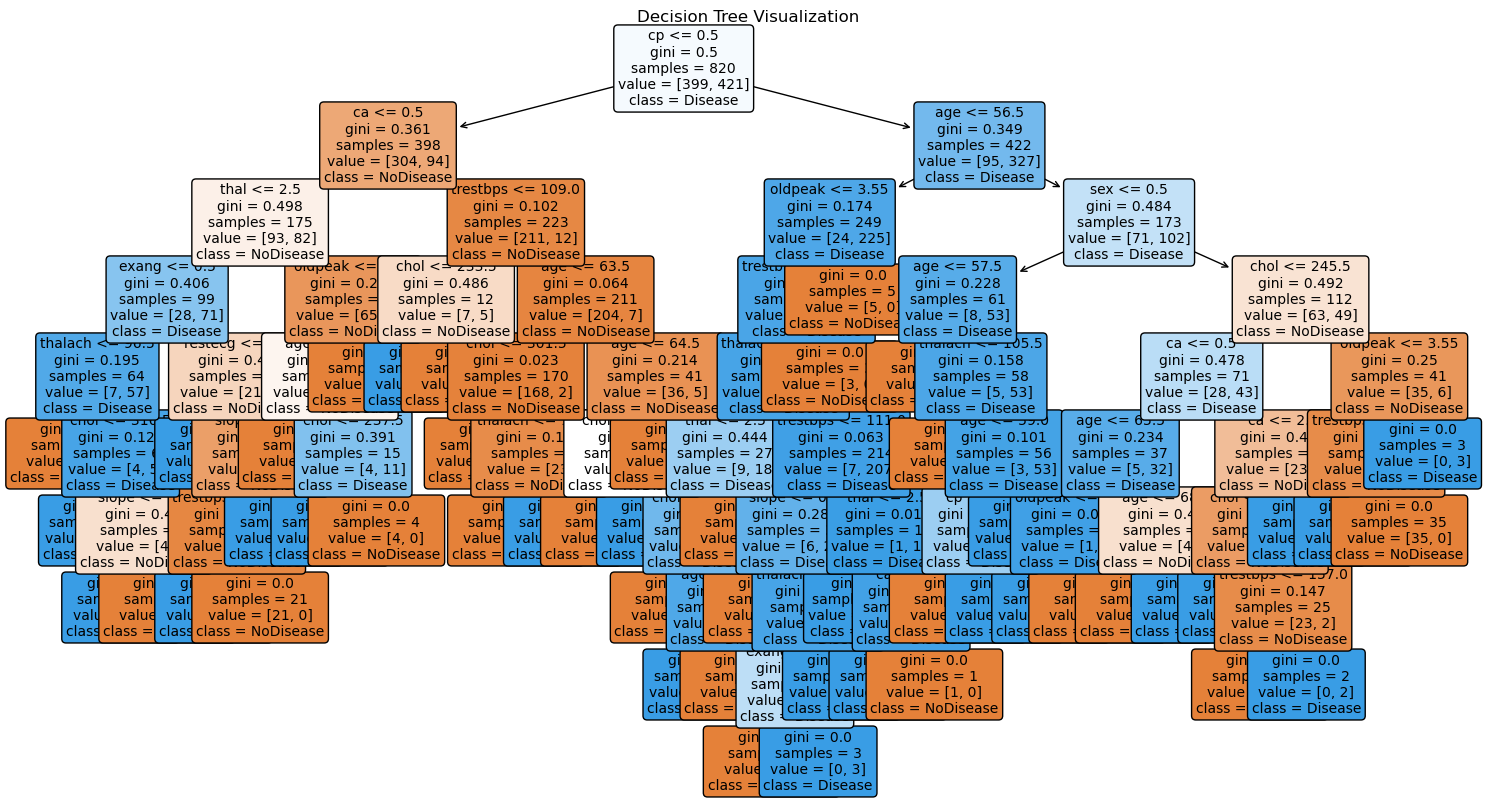

In [25]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

# Visualize (using sklearn’s plot_tree)
plt.figure(figsize=(18,10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["NoDisease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


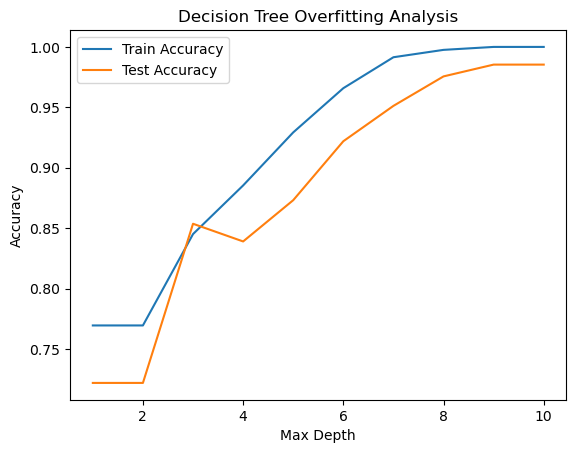

Best Depth Train Accuracy: 0.8853658536585366
Best Depth Test Accuracy: 0.8390243902439024


In [26]:
train_scores, test_scores = [], []
depths = range(1, 11)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Overfitting Analysis')
plt.legend()
plt.show()

# Choose best depth (e.g., 4)
dt_best = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_best.fit(X_train, y_train)
print("Best Depth Train Accuracy:", dt_best.score(X_train, y_train))
print("Best Depth Test Accuracy:", dt_best.score(X_test, y_test))


In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



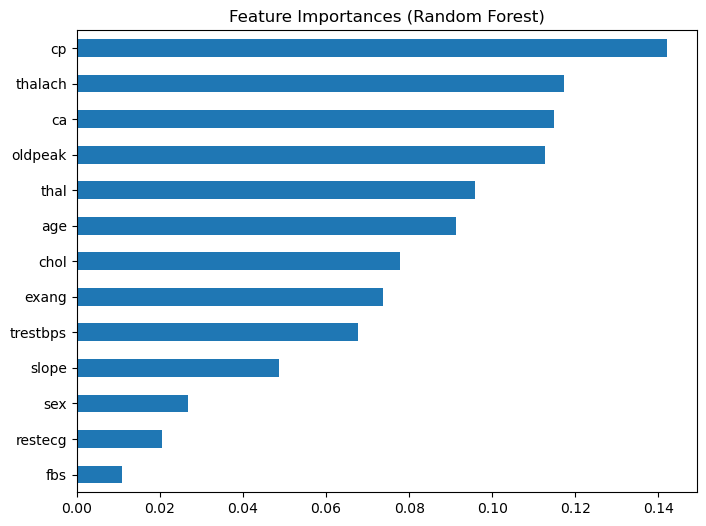

In [28]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances (Random Forest)")
plt.show()
